# Analyze and visualize last.fm listening history

The csv data files were created with [lastfm_downloader.ipynb](lastfm_downloader.ipynb)

In [1]:
import pytz, numpy as np, pandas as pd, string
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from datetime import datetime as dt
%matplotlib inline

In [2]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')
ticks_font_h = fm.FontProperties(family=family, style='normal', size=10.5, weight='normal', stretch='normal')

## Top artists

In [3]:
artists_most = pd.read_csv('data/lastfm_top_artists.csv', encoding='utf-8')
artists_most = artists_most.set_index('artist')['play_count'].head(25)
artists_most.head()

artist
The Kinks              2718
David Bowie            2588
The Beatles            2431
Belle and Sebastian    2292
Radiohead              2151
Name: play_count, dtype: int64

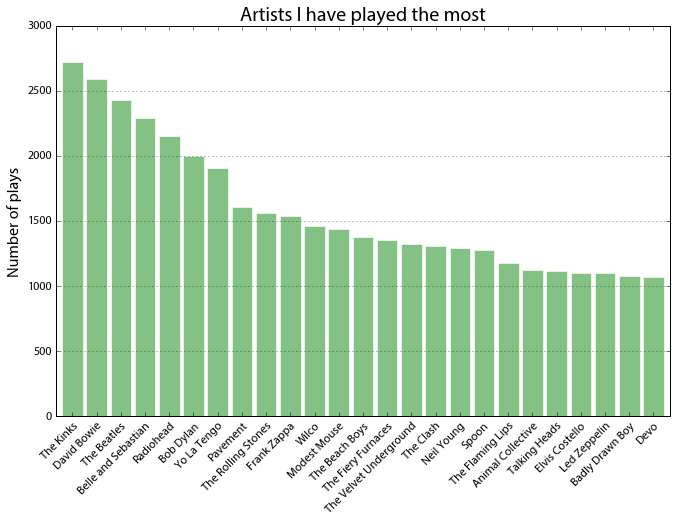

In [4]:
ax = artists_most.plot(kind='bar', figsize=[11, 7], width=0.85, alpha=0.6, color='#339933', edgecolor='w')

ax.yaxis.grid(True)
ax.set_xticklabels(artists_most.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Artists I have played the most', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of plays', fontproperties=label_font)

plt.savefig('images/lastfm-artists-played-most.png', dpi=96, bbox_inches='tight')
plt.show()

## Top tracks

In [5]:
tracks_most = pd.read_csv('data/lastfm_top_tracks.csv', encoding='utf-8')
index = tracks_most.apply(lambda x: u'{}\n{}'.format(x['artist'], x['track']), axis='columns')
tracks_most = tracks_most.set_index(index).drop(labels=['artist', 'track'], axis='columns')
tracks_most = tracks_most['play_count'].head(20)
tracks_most.head()

Wolf Parade\nModern World                 133
The Kinks\nWaterloo Sunset                126
Badly Drawn Boy\nOnce Around the Block    117
The Zombies\nThis Will Be Our Year        113
The Kinks\nDays                           104
Name: play_count, dtype: int64

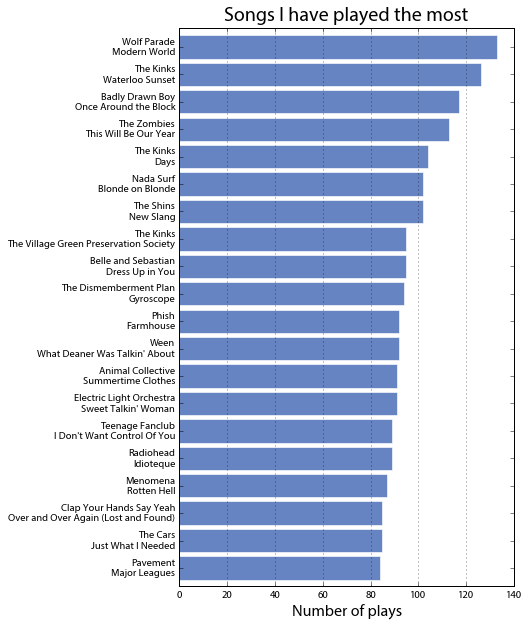

In [6]:
ax = tracks_most.sort_values().plot(kind='barh', figsize=[6, 10], width=0.85, alpha=0.6, color='#003399', edgecolor='w')
ax.xaxis.grid(True)
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)
ax.set_xlabel('Number of plays', fontproperties=label_font)
ax.set_ylabel('', fontproperties=label_font)
ax.set_title('Songs I have played the most', fontproperties=title_font, y=1.005)

plt.savefig('images/lastfm-artists-played-most-h.png', dpi=96, bbox_inches='tight')
plt.show()

## Top albums

In [7]:
albums_most = pd.read_csv('data/lastfm_top_albums.csv', encoding='utf-8')
index = albums_most.apply(lambda x: u'{}\n{}'.format(x['artist'], x['album']), axis='columns')
albums_most = albums_most.set_index(index).drop(labels=['artist', 'album'], axis='columns')
albums_most = albums_most['play_count'].head(30)
albums_most.head()

The Kinks\nThe Kink Kronikles                 746
Frank Black\nTeenager of the Year             703
Devo\nPioneers Who Got Scalped                690
The Zombies\nOdessey and Oracle               675
Badly Drawn Boy\nThe Hour of Bewilderbeast    611
Name: play_count, dtype: int64

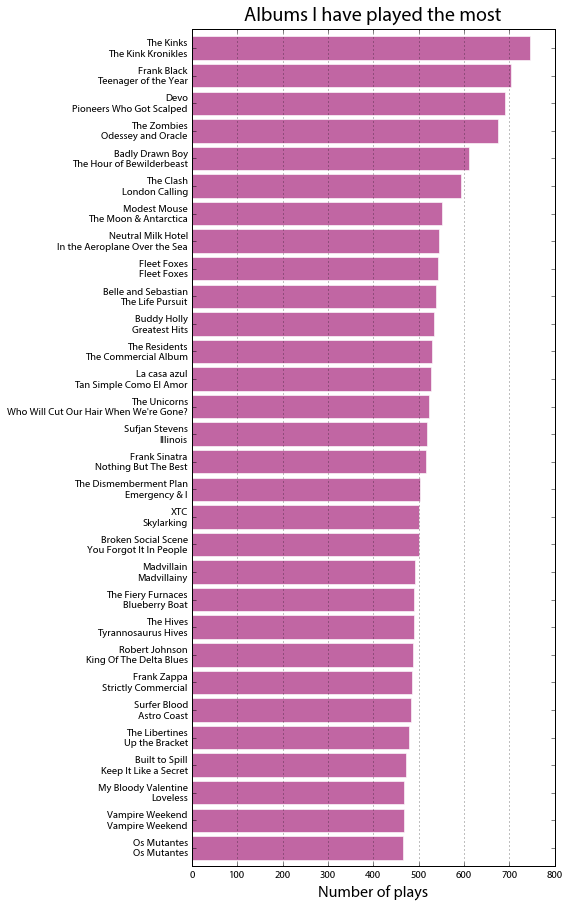

In [8]:
ax = albums_most.sort_values().plot(kind='barh', figsize=[6.5, 15], width=0.85, alpha=0.6, color='#990066', edgecolor='w')
ax.xaxis.grid(True)
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)
ax.set_xlabel('Number of plays', fontproperties=label_font)
ax.set_ylabel('', fontproperties=label_font)
ax.set_title('Albums I have played the most', fontproperties=title_font, y=1.005)

plt.savefig('images/lastfm-albums-played-most-h.png', dpi=96, bbox_inches='tight')
plt.show()

## All-time scrobbles

In [9]:
# read the all-time scrobbles data set
scrobbles = pd.read_csv('data/lastfm_scrobbles.csv', encoding='utf-8')
scrobbles = scrobbles.drop('timestamp', axis=1)
print '{:,} total scrobbles'.format(len(scrobbles))
print '{:,} total artists'.format(len(scrobbles['artist'].unique()))

226,475 total scrobbles
15,309 total artists


According to the last.fm web site, I have ~262,000 scrobbles. This API endpoint seems to miss the ones from before 2007.

In [10]:
# convert to datetime
scrobbles['timestamp'] = pd.to_datetime(scrobbles['datetime'])

In [11]:
# functions to convert UTC to Pacific time zone and extract date/time elements
convert_tz = lambda x: x.to_datetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('US/Pacific'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour

In [12]:
# parse out date and time elements as pacific time
scrobbles['year'] = scrobbles['timestamp'].map(get_year)
scrobbles['month'] = scrobbles['timestamp'].map(get_month)
scrobbles['day'] = scrobbles['timestamp'].map(get_day)
scrobbles['hour'] = scrobbles['timestamp'].map(get_hour)
scrobbles = scrobbles.drop(labels=['datetime'], axis=1)

# drop rows with 01-01-1970 as timestamp
scrobbles = scrobbles[scrobbles['year'] > 1970]
scrobbles.head()

,artist,album,track,timestamp,year,month,day,hour
0,Electric Guest,Mondo,Waves,2016-04-15 20:20:23,2016,2016-04,15,13
1,The Tins,The Tins EP,Subtle Rattle,2016-04-15 20:17:52,2016,2016-04,15,13
2,Generationals,ActorCaster,You Say It Too,2016-04-15 20:14:35,2016,2016-04,15,13
3,Ra Ra Riot,The Orchard,Boy,2016-04-15 20:11:24,2016,2016-04,15,13
4,Miniature Tigers,Cruel Runnings,Swimming Pool Blues,2016-04-15 20:07:56,2016,2016-04,15,13


Timestamp is UTC but the year, month, day, hour columns are Pacific Time

## Year analysis

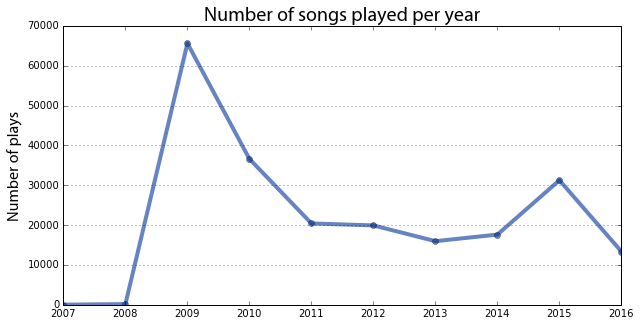

In [13]:
year_counts = scrobbles['year'].value_counts().sort_index()
ax = year_counts.plot(kind='line', figsize=[10, 5], linewidth='4', alpha=0.6, marker='o', color='#003399')

ax.yaxis.grid(True)
ax.set_xticklabels(year_counts.index, rotation=0, rotation_mode='anchor', ha='center')
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per year', fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-year.png', dpi=96, bbox_inches='tight')
plt.show()

## Month analysis

In [14]:
month_counts = scrobbles['month'].value_counts().sort_index()

# not every month necessarily has a scrobble, so fill in missing months with zero counts
date_range = pd.date_range(start=min(scrobbles['timestamp']), end=max(scrobbles['timestamp']), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)
month_counts = month_counts.reindex(index, fill_value=0)

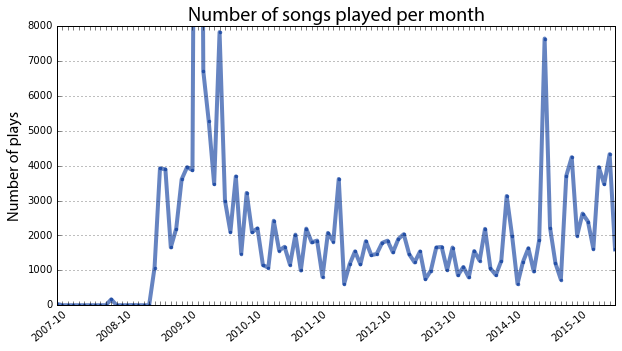

In [15]:
ax = month_counts.plot(kind='line', figsize=[10, 5], linewidth='4', alpha=0.6, marker='.', color='#003399')

xlabels = month_counts.iloc[range(1, len(month_counts), 12)].index
xlabels = [x if x in xlabels else '' for x in month_counts.index]
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=40, rotation_mode='anchor', ha='right')

ax.yaxis.grid(True)
ax.set_ylim((0,8000))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per month', fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-month.png', dpi=96, bbox_inches='tight')
plt.show()

## Hour of the day analysis

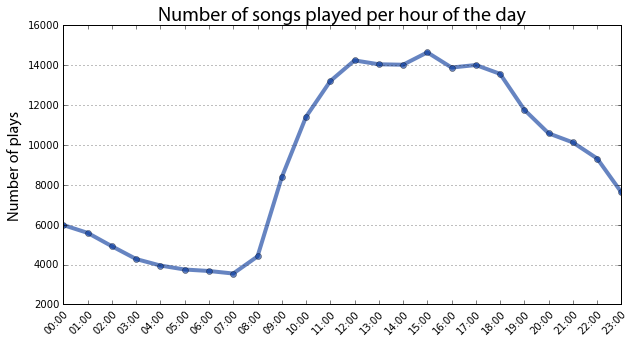

In [16]:
hour_counts = scrobbles['hour'].value_counts().sort_index()
ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth='4', alpha=0.6, marker='o', color='#003399')

xlabels = hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.yaxis.grid(True)
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per hour of the day', fontproperties=title_font)

plt.savefig('images/lastfm-scrobbles-per-hour.png', dpi=96, bbox_inches='tight')
plt.show()

## Analysis of a single year (or multiple years)

Add additional years to the 'isin' list to query multiple years.

In [17]:
scrobbles_year = scrobbles[scrobbles['year'].isin([2015])]
len(scrobbles_year)

31252

In [18]:
# what artists did i play the most that year?
artists_year = scrobbles_year['artist'].value_counts()
artists_year = pd.DataFrame(artists_year).reset_index().rename(columns={'artist':'play count', 'index':'artist'})
artists_year.index = [n + 1 for n in artists_year.index]
artists_year.head(10)

,artist,play count
1,Radiohead,255
2,Bob Dylan,198
3,Yo La Tengo,196
4,Modest Mouse,169
5,The Kinks,160
6,The Beatles,147
7,The Rolling Stones,147
8,Beirut,144
9,David Bowie,129
10,Moondog,108


In [19]:
# what tracks did i play the most that year?
tracks_year = scrobbles_year.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)
tracks_year = tracks_year.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]
tracks_year.index = [n + 1 for n in tracks_year.index]
tracks_year.head(10)

,artist,track,play count
1,Shintaro Sakamoto,"You Can Be A Robot, Too",23
2,Porches,The Cosmos,21
3,Panda Bear,Mr Noah,20
4,Father John Misty,Hollywood Forever Cemetery Sings,20
5,Hinds,Bamboo,19
6,Jamie xx,I Know There's Gonna Be (Good Times),19
7,Cherry Glazerr,Had Ten Dollaz,18
8,The King Khan & BBQ Show,I’ll Be Loving You,18
9,Orange Juice,Falling and Laughing,18
10,SALES,big sis,17


In [20]:
# what albums did i play the most that year?
albums_year = scrobbles_year.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums_year = albums_year.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'album', 'play count']]
albums_year.index = [n + 1 for n in albums_year.index]
albums_year.head(10)

,artist,album,play count
1,Jonathan Richman And The Modern Lovers,Roadrunner: The Beserkley Collection,85
2,Alvvays,Alvvays,68
3,The Rolling Stones,The Rolling Stones Singles Box Set (1971-2006),64
4,Sufjan Stevens,Carrie & Lowell,60
5,Beirut,The Flying Club Cup,59
6,Radiohead,The Bends [Collectors Edition],58
7,Buena Vista Social Club,Buena Vista Social Club,56
8,Moondog,H'art Songs,53
9,Real Estate,Atlas,53
10,Beach House,Depression Cherry,52


## Analysis of a single month (or multiple months)

Add additional months to the 'isin' list to query multiple months.

In [21]:
scrobbles_month = scrobbles[scrobbles['month'].isin(['2014-02'])]
len(scrobbles_month)

1553

In [22]:
# what artists did i play the most that month?
artists_month = scrobbles_month['artist'].value_counts()
artists_month = pd.DataFrame(artists_month).reset_index().rename(columns={'artist':'play count', 'index':'artist'})
artists_month.index = [n + 1 for n in artists_month.index]
artists_month.head(10)

,artist,play count
1,David Bowie,63
2,Mac DeMarco,47
3,Talking Heads,45
4,Wild Nothing,41
5,The Microphones,28
6,Eluvium,26
7,Islands,26
8,The Babies,25
9,Wu-Tang Clan,25
10,CHVRCHES,24


In [23]:
# what tracks did i play the most that month?
tracks_month = scrobbles_month.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)
tracks_month = tracks_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]
tracks_month.index = [n + 1 for n in tracks_month.index]
tracks_month.head(10)

,artist,track,play count
1,The Babies,Moonlight Mile,15
2,Islands,Becoming the Gunship,13
3,Vampire Weekend,Ladies of Cambridge,13
4,Mac DeMarco,My Kind of Woman,13
5,The Magnetic Fields,You Must Be Out Of Your Mind,11
6,CHVRCHES,The Mother We Share,11
7,Wild Nothing,Live In Dreams,11
8,Taj Mahal,Lovin' in My Baby's Eyes,11
9,Wild Nothing,Chinatown,10
10,Gladys Knight & The Pips,Midnight Train to Georgia,10


## Listening history of a specific artist, album, or track

See the last 5 times I've listened to someone or something

In [24]:
# when were the last 5 times I played something by My Bloody Valentine?
scrobbles[scrobbles['artist'].str.contains('My Bloody Valentine')].head()

,artist,album,track,timestamp,year,month,day,hour
13785,My Bloody Valentine,Loveless,Sometimes,2015-12-14 22:03:43,2015,2015-12,14,14
14218,My Bloody Valentine,Loveless,Sometimes,2015-12-10 01:07:06,2015,2015-12,9,17
15559,My Bloody Valentine,Loveless,Only Shallow,2015-11-18 03:02:38,2015,2015-11,17,19
17701,My Bloody Valentine,Loveless,Come in Alone,2015-10-28 23:49:06,2015,2015-10,28,16
17707,My Bloody Valentine,Loveless,To Here Knows When,2015-10-28 23:25:08,2015,2015-10,28,16


In [25]:
# when were the last 5 times I played something off of Double Nickels on the Dime?
scrobbles[scrobbles['album'].fillna('').str.contains('Double Nickels')].head()

,artist,album,track,timestamp,year,month,day,hour
3158,Minutemen,Double Nickels on the Dime,History Lesson Part 2,2016-03-18 22:02:33,2016,2016-03,18,15
3240,Minutemen,Double Nickels on the Dime,Two Beads at the End,2016-03-18 19:12:22,2016,2016-03,18,12
3253,Minutemen,Double Nickels on the Dime,Dr. Wu,2016-03-18 18:48:25,2016,2016-03,18,11
3281,Minutemen,Double Nickels on the Dime,Themselves,2016-03-18 18:02:38,2016,2016-03,18,11
6567,Minutemen,Double Nickels on the Dime,History Lesson Part 2,2016-02-25 22:27:05,2016,2016-02,25,14


In [26]:
# when were the last 5 times I played Personality Crisis?
scrobbles[scrobbles['track'].str.contains('Personality Crisis')].head()

,artist,album,track,timestamp,year,month,day,hour
7128,New York Dolls,New York Dolls,Personality Crisis,2016-02-23 02:52:54,2016,2016-02,22,18
13994,New York Dolls,New York Dolls,Personality Crisis,2015-12-12 04:30:46,2015,2015-12,11,20
16335,New York Dolls,New York Dolls,Personality Crisis,2015-11-11 00:10:29,2015,2015-11,10,16
32975,New York Dolls,New York Dolls,Personality Crisis,2015-04-18 04:21:11,2015,2015-04,17,21
43109,New York Dolls,New York Dolls,Personality Crisis,2015-02-09 04:18:39,2015,2015-02,8,20


## Visualize top artists over time

In [27]:
def get_colors(cmap, n, start=0, stop=1):
    '''return n-length list of rgba colors from the passed colormap name; limit extent by start/stop values'''
    import matplotlib.cm as cm, numpy as np
    return [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]

In [28]:
# get the cumulative play counts since 2009 for the top n most listened-to artists
n = 6
plays = scrobbles[scrobbles['artist'].isin(artists_most.head(n).index)]
plays = plays[plays['year'] > 2008]
plays = plays.groupby(['artist','year']).count().groupby(level=[0]).cumsum()['track']
top_artists = plays.index.levels[0]

In [29]:
# get one color per artist
colors = get_colors('Dark2', n)

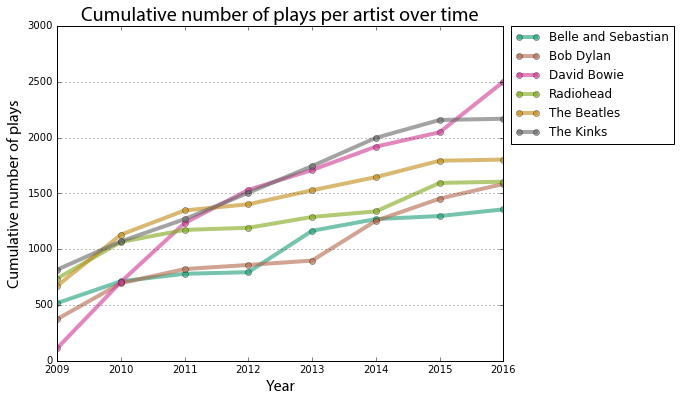

In [30]:
fig, ax = plt.subplots(figsize=[8, 6])
lines = []
for artist, c in zip(top_artists, colors):
    ax = plays[artist].plot(kind='line', linewidth='4', alpha=0.6, marker='o', color=c)
    lines.append(artist)
    
ax.yaxis.grid(True)
ax.set_xticklabels(plays.index.levels[1], rotation=0, rotation_mode='anchor', ha='center')
ax.set_ylabel('Cumulative number of plays', fontproperties=label_font)
ax.set_xlabel('Year', fontproperties=label_font)
ax.set_title('Cumulative number of plays per artist over time', fontproperties=title_font)
ax.legend(lines, loc='upper right', bbox_to_anchor=(1.395,1.017))

plt.savefig('images/lastfm-scrobbles-top-artists-years.png', dpi=96, bbox_inches='tight')
plt.show()

## Characteristics of artists' names

In [31]:
# remove 'The ' preceding artist names, get unique set of names, then get first letter frequency
artists_clean = scrobbles['artist'].str.replace('The ','')
first_letters = pd.Series(artists_clean.unique()).map(lambda x: x.upper()[0]).value_counts()
first_letters = first_letters[[c for c in string.uppercase]]

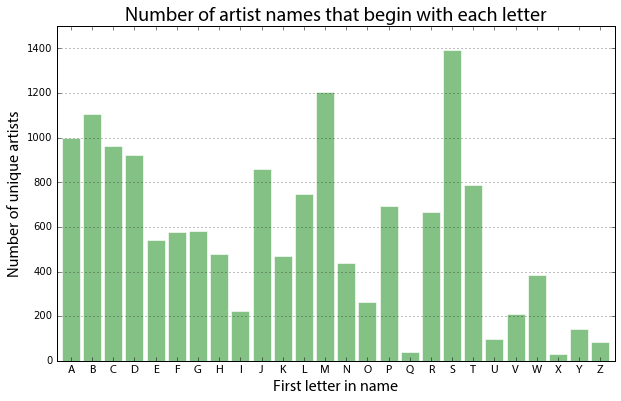

In [32]:
# plot the frequency of artist names that begin with each letter
ax = first_letters.plot(kind='bar', figsize=[10, 6], width=0.85, alpha=0.6, color='#339933', edgecolor='w')
ax.yaxis.grid(True)
ax.set_ylim((0, 1500))
ax.set_xticklabels(first_letters.index, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)

ax.set_title('Number of artist names that begin with each letter', fontproperties=title_font)
ax.set_xlabel('First letter in name', fontproperties=label_font)
ax.set_ylabel('Number of unique artists', fontproperties=label_font)

plt.savefig('images/lastfm-artists-first-letter-count.png', dpi=96, bbox_inches='tight')
plt.show()

In [33]:
# which artist names begin with the letter 'X'?
pd.Series(artists_clean[artists_clean.str.upper().str.startswith('X')].unique())

0              X-Ray Spex
1                     XTC
2                       X
3                  Xcerts
4                 Xandria
5           Xavier Naidoo
6         Ximena Sariñana
7           Xenia Rubinos
8                  XXYYXX
9                      xx
10                   XY&O
11          X Ambassadors
12         Xylouris White
13                   xolo
14       Xmal Deutschland
15    X-Marks the Pedwalk
16             XYconstant
17                 XO MAN
18                     XO
19                   XYLØ
20                 Xinobi
21           Xinlisupreme
22                  Xatar
23     Xristos Menidiatis
24       Xeno & Oaklander
25                  X-Men
26           Xavier Davis
27                     xL
28       Xploding Plastix
29                Xiu Xiu
30                 Xororó
31                Xibalba
dtype: object

In [34]:
# what are the most common first words in artist names that begin with 'M'?
artists_m = pd.Series(artists_clean[artists_clean.str.upper().str.startswith('M')].unique())
artists_m.map(lambda x: x.split()[0]).value_counts().head(15)

Michael    29
Mark       19
MC         19
Martin     19
Matt       17
Mc         17
Maria      16
Mike       16
Mary       16
Max        15
My         13
Mr.        13
Magic       9
Marc        8
Modern      8
dtype: int64

In [35]:
# what are the most common first words in all the artist names?
pd.Series(artists_clean.unique()).map(lambda x: x.split()[0].lower()).value_counts().head(15)

john       69
black      51
dj         49
new        44
little     39
david      37
mc         36
james      36
big        35
los        33
paul       30
michael    29
a          29
johnny     29
peter      29
dtype: int64

In [36]:
# what are the most common words in all the artist names, anywhere in the name?
word_list = []
stop_list = ['&','the','and','of','a','and','in','for','la','de']
for artist in artists_clean.unique():
    for word in artist.split():
        word_list.append(word.lower())

word_list = [word for word in word_list if word not in stop_list]
pd.Series(word_list).value_counts().head(15)

band         138
orchestra    120
his           88
john          87
black         71
james         57
new           54
dj            53
brothers      51
david         45
white         44
little        43
young         42
paul          42
lee           40
dtype: int64

In [37]:
# what is the longest artist name?
print max(artists_clean, key=len)

Adam Baldych, Baltic Gang, Lars Danielsson, Jacob Karlzon, Morten Lund, Verneri Pohjola & Marius Neset


In [38]:
# what is the distribution of lengths of artist names (number of characters)?
name_lengths = pd.Series([len(artist) for artist in artists_clean.unique()])
name_lengths = name_lengths.value_counts().sort_index()
name_lengths = name_lengths.iloc[0:51].reindex(range(51), fill_value=0)

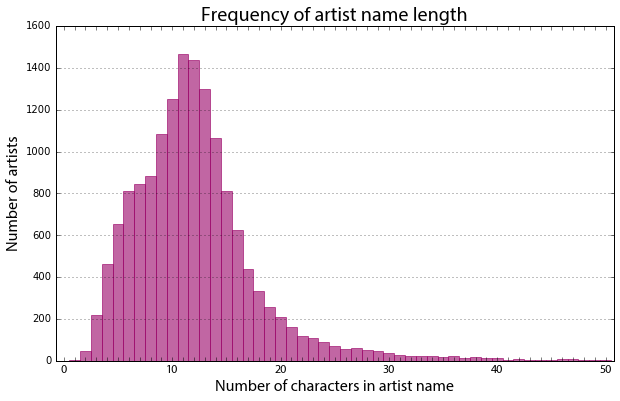

In [39]:
ax = name_lengths.plot(kind='bar', figsize=(10,6), alpha=0.6, width=1, color='#990066', edgecolor='#990066')

xlabels = [x if x % 10 == 0 else '' for x in name_lengths.index]
ax.set_xticklabels(xlabels, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)
ax.yaxis.grid(True)

ax.set_title('Frequency of artist name length', fontproperties=title_font)
ax.set_xlabel('Number of characters in artist name', fontproperties=label_font)
ax.set_ylabel('Number of artists', fontproperties=label_font)

plt.savefig('images/lastfm-artists-name-length.png', dpi=96, bbox_inches='tight')
plt.show()